In [45]:
import json
from matplotlib import pyplot
from shapely.geometry import Polygon, shape, mapping
from shapely.geometry import Point
import pyproj    
import shapely
import shapely.ops as ops
from shapely.geometry.polygon import Polygon
from functools import partial
import warnings
import random
warnings.filterwarnings('ignore')


with open('countries.geojson') as f:
    countries = json.load(f)

countriesDict = {}
for country in countries['features']:
    name = country['properties']['ADMIN']
    countriesDict[name] = country

In [46]:
israel = countriesDict['Israel']
australia = countriesDict['Australia']

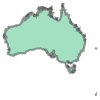

In [47]:
shape(australia['geometry'])


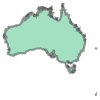

In [48]:
shape(australia['geometry'])

In [49]:
countriesName = list(countriesDict.keys())

Guinea Bissau


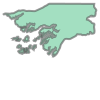

In [50]:
import random
country = random.choice(countriesName)

print(country)
poly = countriesDict[country]['geometry']
shape(poly)

In [51]:
games = {"GamesHistory":[]}
def addNewGame(countrya, countryb, countryc, countryd, answer, choosen_answer):
    newGame = {
        'choise_a':countrya,
        'choise_b':countryb,
        'choise_c':countryc,
        'choise_d':countryd,
        'answer':answer,
        'choosen_answer': choosen_answer
    }
    games["GamesHistory"].append(newGame)

addNewGame('aa','bb','cc','dd','a','n')

In [52]:
import matplotlib.pyplot as plt
def print_statistics(games):
    print('Statistics:')

    total = len(games['GamesHistory'])
    print('Num of games:' +str(total))

    user_correct_answers = list(map(lambda x: (x['answer'] == x['choosen_answer']), games['GamesHistory']))

    correct = len([x for x in user_correct_answers if True == x])
    print('Correct answers: '+ str(round(correct/total*100,2)) + '%')

print_statistics(games)   

def print_poly(coutry_data):
    fig, axs = plt.subplots()
    plt.axis('off')
    for geom in shape(coutry_data).geoms:    
        xs, ys = geom.exterior.xy    
        axs.fill(xs, ys, alpha=0.5, fc='r', ec='none')
    plt.show()

def check_answer(input, right_answer):
    [print("\n****CORRECT!!***") if input == right_answer else print('\n***WRONG ANSWER*** \nthe correct answer is '+right_answer)]

def create_new_game():
    countrya = random.choice(countriesName)
    countryb = random.choice(countriesName)
    countryc = random.choice(countriesName)
    countryd = random.choice(countriesName)

    random_answer = random.randint(0,3)
    
    correct_answer = ['a', 'b', 'c', 'd'][random_answer]
    draw_country = [countrya, countryb, countryc, countryd][random_answer]

    #print(countrya)
    poly = countriesDict[countrya]['geometry']
    print_poly(poly)

    print('a - '+countrya)
    print('b - '+countryb)
    print('c - '+countryc)
    print('d - '+countryd)

    user_input = input('Guess country:')
    check_answer(user_input,correct_answer)
    addNewGame(countrya,countryb,countryc,countryd,user_input,user_input)


Statistics:
Num of games:1
Correct answers: 0.0%


Nicaragua


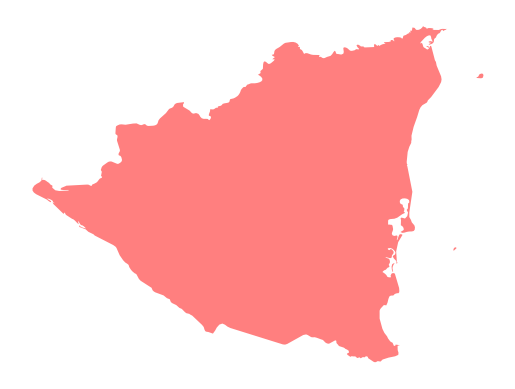

a - Nicaragua
b - Djibouti
c - Benin
d - Western Sahara

***WRONG ANSWER*** 
the correct answer is b

Statistics:
Num of games:2
Correct answers: 50.0%


In [53]:
create_new_game()
print()
print_statistics(games)

In [54]:
from shapely.geometry import Polygon, Point

In [55]:
def proj_country(country):
    return ops.transform(
    partial(
        pyproj.transform,
        pyproj.Proj(init='EPSG:4326'),
        pyproj.Proj(
            proj='aea',
            lat_1=country.bounds[1],
            lat_2=country.bounds[3]
        )
    ),
    country)
    

def distance_country(countryA, countryB):

    a = shape(countryA).centroid
    b = shape(countryB).centroid

    aa = proj_country(a)
    bb = proj_country(b)

    return aa.distance(bb)/1000
distance_country(australia['geometry'],israel['geometry'])

15211.144213321539